In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import distributions as dist
import pymc3 as pm

In [48]:
def cos(x):
    return np.cos(2*x*np.pi)

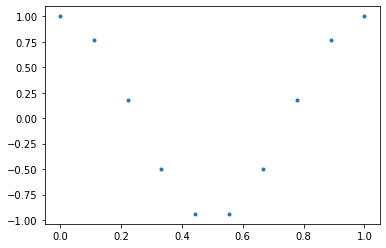

In [49]:
x=np.linspace(0,1,10)
y=cos(x)
plt.plot(x,y,".")

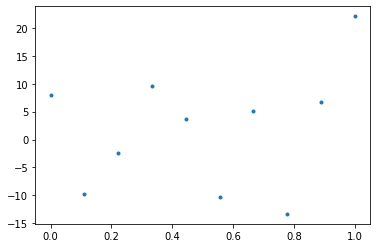

In [50]:
e=dist.norm(0,12).rvs(len(x))
y_obs=cos(x)+e
plt.plot(x,y_obs,".")
plt.show()

In [51]:
p_n=np.poly1d(np.polyfit(x,y_obs,deg=1))
p_n(9)

75.64282774249794

In [52]:
p1=np.poly1d(np.polyfit(x,y_obs,deg=1));
p2=np.poly1d(np.polyfit(x,y_obs,deg=2));
p3=np.poly1d(np.polyfit(x,y_obs,deg=3));
p4=np.poly1d(np.polyfit(x,y_obs,deg=4));
p5=np.poly1d(np.polyfit(x,y_obs,deg=5));
p6=np.poly1d(np.polyfit(x,y_obs,deg=6));
p7=np.poly1d(np.polyfit(x,y_obs,deg=7));
p8=np.poly1d(np.polyfit(x,y_obs,deg=8));
p9=np.poly1d(np.polyfit(x,y_obs,deg=9))



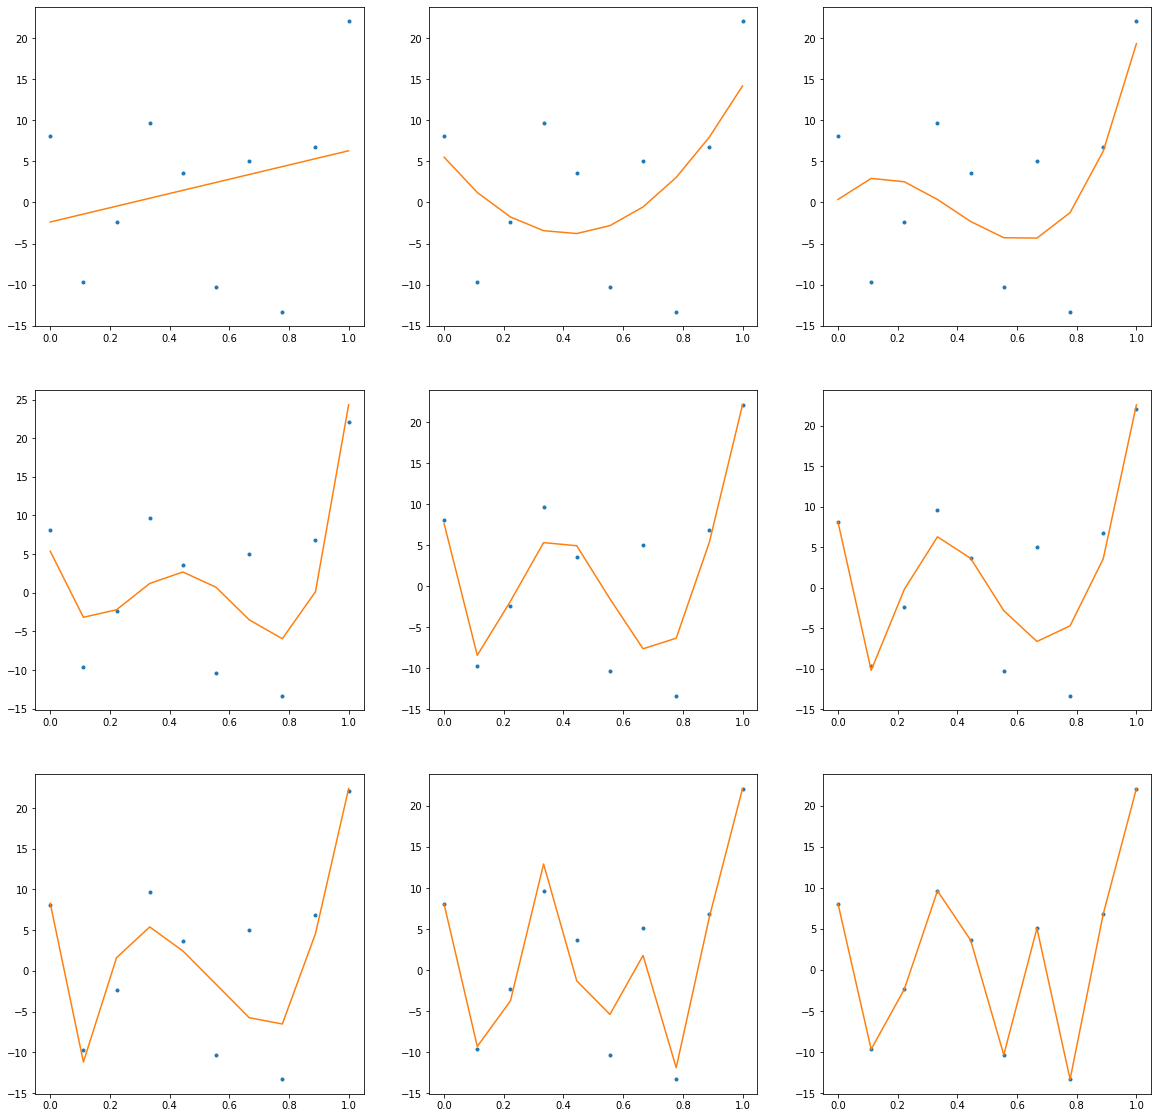

In [53]:
x_new=np.linspace(0,1,10)
y_1=p1(x_new)
y_2=p2(x_new)
y_3=p3(x_new)
y_4=p4(x_new)
y_5=p5(x_new)
y_6=p6(x_new)
y_7=p7(x_new)
y_8=p8(x_new)
y_9=p9(x_new)
_,axi=plt.subplots(3,3,figsize=(20,20))
axi[0,0].plot(x,y_obs,".",x_new,y_1)
axi[0,1].plot(x,y_obs,".",x_new,y_2)
axi[0,2].plot(x,y_obs,".",x_new,y_3)
axi[1,0].plot(x,y_obs,".",x_new,y_4)
axi[1,1].plot(x,y_obs,".",x_new,y_5)
axi[1,2].plot(x,y_obs,".",x_new,y_6)
axi[2,0].plot(x,y_obs,".",x_new,y_7)
axi[2,1].plot(x,y_obs,".",x_new,y_8)
axi[2,2].plot(x,y_obs,".",x_new,y_9)
plt.show()
#plt.plot(x,y_obs,".",x_new,y_new)

In [54]:
polynomial_list={"p1":p1,"p2":p2,"p3":p3,"p4":p4,"p5":p5,"p6":p6,"p7":p7,"p8":p8,"p9":p9}
min_length=10

df= pd.DataFrame({k:pd.Series(v[min_length]) for k,v in polynomial_list.items()})
df

,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,0,0,0,0,0,0,0,0,0


In [55]:
p1

poly1d([ 8.66923057, -2.38024743])

In [56]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse1 = sqrt(mean_squared_error(y_obs, y_1))

print (rmse1)

9.989397984136998


In [57]:
rmse2 = sqrt(mean_squared_error(y_obs, y_2))
rmse3= sqrt(mean_squared_error(y_obs, y_3))
rmse4= sqrt(mean_squared_error(y_obs, y_4))
rmse5= sqrt(mean_squared_error(y_obs, y_5))
rmse6= sqrt(mean_squared_error(y_obs, y_6))
rmse7= sqrt(mean_squared_error(y_obs, y_7))
rmse8= sqrt(mean_squared_error(y_obs, y_8))
rmse9= sqrt(mean_squared_error(y_obs, y_9))

In [58]:
#The cosine distribution is an approximation to the normal distribution
α=dist.norm(0,12).rvs(10)
β=dist.norm(0,12).rvs(10)
σ=dist.halfnorm(12)

In [59]:
with pm.Model() as Manamela:
    α=pm.Normal("α",0,12)
    β=pm.Normal( "β",0,12)
    σ=pm.HalfNormal( "σ",12)
    μ=pm.Deterministic("μ", α+ β * x)
    y_ob=pm.Normal("y_obs", mu= μ, sigma= σ, observed= y_obs)
    trace= pm.sample(20000, tune=100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β, α]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 40200/40200 [00:59<00:00, 681.33draws/s]
The acceptance probability does not match the target. It is 0.9148496850301167, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.929214214084693, but should be close to 0.8. Try to increase the number of tuning steps.
